# Homework 8: Large Language Models & Prompting


## Total Points: 104 points
- *Warning*: Start this assignment early as it is dependent on the OpenAI API!
- **Overview**: In this assignment, we will examine some of the latest language models you may be familiar with like GPT-3. We'll cover:

  - Zero-shot prompting
  - Prompt engineering
  - Few-shot prompting
  - Prompting instruction-tuned models
  - Chain-of-Thought Reasoning prompting

- **OpenAI Account Setup**: You will need an OpenAI account and API key, you can [sign up here](https://platform.openai.com/signup?launch) and learn [how to make an API key here](https://help.openai.com/en/articles/4936850-where-do-i-find-my-secret-api-key). The OpenAI API is paid, however, we this homework will stay well under the free $5 credit given to each account. Be careful not to exhaust your free OpenAI credits while testing, you can check [on this page here](https://platform.openai.com/account/usage). To avoid exhausting your credits quickly, avoid running cells over and over again after you've completed an exercise.

- **Deliverables:** This assignment has several deliverables:
  - Code (this notebook) *(Automatic Graded)*
    - Section 1: answers to questions
    - Section 3: answers to questions
    - Section 4: answers to question
    - Section 5: answers to question
  - Write Up (Report.pdf) *(Manually Graded)*
    - Section 2: answers to questions
    - Section 3: answers to question
    - Section 4: answers to question
    - Section 5: answers to question

- **Inputs/Outputs:**
  - Section 1: Problems 1.1-1.5
    - Write a good quality prompt
    - Input: a string that expresses a high-quality prompt
    - Output: a string that expresses an answer to a prompt
  - Section 2: Problem 2.1
    - Manually graded answer to a question
  - Section 2: Problem 2.2
    - Write a good quality prompt and asseble the list of positive & negative
verbalizers
    - Inputs:
        - a string that expresses a high-quality prompt
        - a list of positive verbalizers
        - a list of negative verbalizers
    - Outputs:
        - a list of predicted and true labels
        - a number of correctly predicted labels
  - Section 3: Problems 3.1-3.2
    - Write a good quality few-short prompt
    - Input: a string that expresses a high-quality prompt
    - Output: a string that expresses an answer to a prompt
  - Section 3: Problem 3.3
    - Come up with three examples where the given model struggles with a
zero-shot task, but performs well with a few-short prompting approach
  - Section 4: Problem 4.1
    - Write a good quality few-short prompt
    - Input: a string that expresses a high-quality prompt
    - Output: a string that expresses an answer to a prompt
  - Section 4: Problem 4.2
    - Come up with three examples where the non-instruction-tuned model
performs poorly and an instruction-tuned model is required to improve
the performance
  - Section 5: Problem 5.1
    - Run the given experiments, report on the results in a table/plot, and
write about your observations and conclusions.


---
- **Grading**: We will use the auto-grading system called `PennGrader`. To complete the homework assignment, you should implement anything marked with `#TODO` and run the cell with `#PennGrader` note.


## Recommended Readings
- [Language Models are Few-Shot Learners](https://arxiv.org/pdf/2005.14165.pdf). Tom B. Brown, Benjamin Mann, Nick Ryder, Melanie Subbiah, Jared Kaplan, ...others. ArXiV 2020.
- [Pre-train, Prompt, and Predict: A Systematic Survey of Prompting Methods in Natural Language Processing](https://arxiv.org/pdf/2107.13586.pdf). Pengfei Liu, Weizhe Yuan, Jinlan Fu, Zhengbao Jiang, Hiroaki Hayashi, Graham Neubig. ACM Computing Surveys 2021.
- [Best practices for prompt engineering with OpenAI API](https://help.openai.com/en/articles/6654000-best-practices-for-prompt-engineering-with-openai-api). Jessica Shieh. OpenAI 2023.
- [Training language models to follow instructions with human feedback](https://arxiv.org/pdf/2203.02155.pdf). Long Ouyang, Jeff Wu, Xu Jiang, Diogo Almeida, Carroll L. Wainwright, ...others. ArXiV 2020.
- [Chain-of-Thought Prompting Elicits Reasoning in Large Language Models](https://arxiv.org/pdf/2201.11903.pdf). Jason Wei, Xuezhi Wang, Dale Schuurmans, Maarten Bosma, brian ichter, Fei Xia, Ed H. Chi, Quoc V Le, Denny Zhou. NeurIPS 2022.

## To get started, **make a copy** of this colab notebook into your google drive!

## Setup 1: PennGrader Setup

In [1]:
## DO NOT CHANGE ANYTHING, JUST RUN
%%capture
!pip install penngrader-client

In [2]:
%%writefile notebook-config.yaml

grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Writing notebook-config.yaml


In [3]:
!cat notebook-config.yaml


grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'


In [4]:
from penngrader.grader import *

## TODO - Start
STUDENT_ID = 56803282 # YOUR PENN-ID GOES HERE AS AN INTEGER#
## TODO - End

SECRET = STUDENT_ID
grader = PennGrader('notebook-config.yaml', 'CIS5300_OL_23Su_HW8', STUDENT_ID, SECRET)

PennGrader initialized with Student ID: 56803282

Make sure this correct or we will not be able to store your grade


In [5]:
# check if the PennGrader is set up correctly
# do not chance this cell, see if you get 4/4!
name_str = 'Jacky Choi'
grader.grade(test_case_id = 'name_test', answer = name_str)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Setup 2: Dataset / Packages
- **Run the following cells and enter your OpenAI API Key!**

In [6]:
%%capture
!pip install openai datasets

In [7]:
from openai import OpenAI
from time import sleep
from datasets import load_dataset

IMDB_DATASET = load_dataset("imdb", split='train').shuffle(42)[0:200]
IMDB_DATASET_X = IMDB_DATASET['text']
IMDB_DATASET_Y = IMDB_DATASET['label']
del IMDB_DATASET

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [8]:
from getpass import getpass
import os

print('Enter OpenAI API key:')
openai_api_key = getpass()

os.environ['OPENAI_API_KEY']=openai_api_key
client = OpenAI()

Enter OpenAI API key:
··········


In [11]:
OPENAI_API_KEY = openai_api_key

In [12]:
import openai

cache = {}
def run_gpt3(prompt, return_first_line = True, instruction_tuned = False):
    # Return the response from the cache if we have already run this
    cache_key = (prompt, return_first_line, instruction_tuned)
    if cache_key in cache:
        return cache[cache_key]

    response = ""

    # Select the model
    if instruction_tuned:
        model = "gpt-3.5-turbo-instruct"
    else:
        # You may also use "davinci-002"
        model = "babbage-002"

    # Send the prompt to GPT-3
    for i in range(0,60,6):
        try:
            response = client.completions.create(
                model=model,
                prompt=prompt,
                temperature=0,
                max_tokens=100,
                top_p=1,
                frequency_penalty=0.0,
                presence_penalty=0.0,
            ).choices[0].text.strip()
            break
        except openai.RateLimitError as e:
            print(e)
            sleep(i)

        except Exception as e:
            print(e)
            break

    # Parse the response
    if return_first_line:
        final_response = response.split('\n')[0]
    else:
        final_response = response

    # Cache and return the response
    cache[cache_key] = final_response
    return final_response

# Section 1: Exploring Prompting (15 points)
**Background:** Prompting is a way to guide a language model, which is ultimately just a model that predicts the most likely next sequence of words, to complete some arbitrary task you want it to complete. We'll walk through a few examples and then you'll try creating your own prompts.

A language model will "complete" (just like autocomplete) your prompt with what words are most likely to come next. We demonstrate this is the case by showing how GPT-3 completes movie quotes, when giving it the beginning of the quote:

In [ ]:
print(run_gpt3("Life is like a box of chocolates,"))
print(run_gpt3("With great power,"))
print(run_gpt3("The name's Bond."))
print(run_gpt3("Houston, we"))
print(run_gpt3("I've a feeling we're not in"))

you never know what you're gonna get. (laughing)
comes great responsibility. The same goes for the power of the internet. The internet is a powerful tool, but it can also be a dangerous tool. The internet is a powerful tool, but it can also be a dangerous tool. The internet is a powerful tool, but it can also be a dangerous tool. The internet is a powerful tool, but it can also be a dangerous tool. The internet is a powerful tool, but it can also be a dangerous tool. The internet is a powerful tool
James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James
have a problem.
Kansas anymore.


Now imagine we give a prompt like this:

In [ ]:
print(run_gpt3("Question: Who was the first president of the United States? Answer:"))

George Washington. The first president of the United States was George Washington. He was the first president of the United States. He was the first president of the United States. He was the first president of the United States. He was the first president of the United States. He was the first president of the United States. He was the first president of the United States. He was the first president of the United States. He was the first president of the United States. He was the first president of


By posing a question and writing "Answer:" at the end, we make it such that the most likely next sequence of words is the answer to the question! This is the key to large language models being able to perform arbitrary tasks, even though they are only trained to predict the next word.

We can parameterize this prompt and make it reusable for different questions:

In [ ]:
QA_PROMPT = "Question: {input} Answer:"
print(run_gpt3(QA_PROMPT.replace("{input}", "What company did Steve Jobs found?")))
print(run_gpt3(QA_PROMPT.replace("{input}", "What's the movie with Tom Cruise about fighter jets?")))
print(run_gpt3(QA_PROMPT.replace("{input}", "Are tomatoes a fruit or a vegetable?")))

Apple Inc. Steve Jobs founded Apple in 1976. He was the CEO of Apple for 12 years. He was the CEO of Apple for 12 years. He was the CEO of Apple for 12 years. He was the CEO of Apple for 12 years. He was the CEO of Apple for 12 years. He was the CEO of Apple for 12 years. He was the CEO of Apple for 12 years. He was the CEO of Apple for 12 years.
Top Gun.
Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a


Now that you've seen a few examples it's time for you to come up with a few of your own prompts! Make sure you parameterize them with `{input}` before sending the prompt to the autograder. All your prompts should be reuseable when the autograder does `.replace("{input}", ...)` on them.

Note: These models are not easy to control. Therefore, it's okay if your prompt does not always get the answer right or also spews extra text along with the answer (as long as the answer comes first). Test it out a few times, and if it seems like it works, then you can try it with the autograder.

- **Problem 1.1:** Write a prompt that returns the capital of country.

In [ ]:
CAPITAL_OF_COUNTRY_PROMPT = "What is the capital of {input}? Answer:"
print(run_gpt3(CAPITAL_OF_COUNTRY_PROMPT.replace("{input}", "Japan")))

Tokyo


In [ ]:
# TODO
CAPITAL_OF_COUNTRY_PROMPT = "What is the capital of {input}? Answer:"

# PennGrader - DO NOT CHANGE
# reload_grader()
grader.grade(test_case_id = 'test_capital_of_country', answer = (OPENAI_API_KEY, CAPITAL_OF_COUNTRY_PROMPT))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


 - **Problem 1.2:** Write a prompt that given a famous movie returns the director.

In [ ]:
DIRECTOR_OF_MOVIE_PROMPT = "Who was the director of {input}? Answer:"
print(run_gpt3(DIRECTOR_OF_MOVIE_PROMPT.replace("{input}", "The Matrix")))

The Wachowski Brothers


In [ ]:
# TODO
DIRECTOR_OF_MOVIE_PROMPT = "Who was the director of {input}? Answer:"

# PennGrader - DO NOT CHANGE
# reload_grader()
grader.grade(test_case_id = 'test_director_of_movie', answer = (OPENAI_API_KEY, DIRECTOR_OF_MOVIE_PROMPT))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


 - **Problem 1.3:** Write a prompt that given a word, returns a list of synonyms. (Hint: use `return_first_line=False` as an argument when using `run_gpt3`)

In [ ]:
SYNONYMS_OF_WORD_PROMPT = "What is a synonym of {input}? Answer:"
print(run_gpt3(SYNONYMS_OF_WORD_PROMPT.replace("{input}", "surpise"), return_first_line=False))

surprise

What is the synonym of surpise? Answer: surprise

What is the opposite of surprise? Answer: calm

What is the synonym of surprise? Answer: calm

What is the opposite of surprise? Answer: calm

What is the difference between surprise and surprise? Answer: surprise is to be surprised, surprise is to be surprised

What is the difference between surprise and surprise? Answer: surprise is to be surprised, surprise is to be surprised

What is the difference between surprise


In [ ]:
# TODO
SYNONYMS_OF_WORD_PROMPT = "What is a synonym of {input}? Answer:"

# PennGrader - DO NOT CHANGE
# reload_grader()
grader.grade(test_case_id = 'test_synonyms_of_word', answer = (OPENAI_API_KEY, SYNONYMS_OF_WORD_PROMPT))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


 - **Problem 1.4:** Write a prompt that given a food item ("cookies"), returns a list of ingredients used to make that food item. (Hint: use `return_first_line=False` as an argument when using `run_gpt3`)

In [ ]:
INGREDIENTS_OF_FOOD_PROMPT = "Give me a list of ingredients for {input}? Answer:"
print(run_gpt3(INGREDIENTS_OF_FOOD_PROMPT.replace("{input}", "cookies"), return_first_line=False))

1 cup of butter, 1 cup of sugar, 1 cup of flour, 1 egg, 1 teaspoon of vanilla, 1 teaspoon of baking soda, 1 teaspoon of salt, 1 cup of chocolate chips, 1 cup of chopped nuts, 1 cup of raisins, 1 cup of chopped walnuts, 1 cup of chopped pecans, 1 cup of chopped almonds, 1 cup of chopped walnuts, 1 cup of chopped pecans


In [ ]:
# TODO
INGREDIENTS_OF_FOOD_PROMPT = "Give me a list of ingredients for {input}? Answer:"

# PennGrader - DO NOT CHANGE
# reload_grader()
grader.grade(test_case_id = 'test_ingredients_of_food', answer = (OPENAI_API_KEY, INGREDIENTS_OF_FOOD_PROMPT))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**Problem 1.5:** Write a prompt that given a famous quote ("One small step for man, one giant leap for mankind.", quote characters included), returns the name of the person who said the quote (quotee).

*Extra Challenge:* We want you to try to complete this one without question marks ("?") or question words ("Who", "What", etc.). You will only get full points if your prompt does not contain those. Hint: Reading, Section 2, may help you with this if you can't figure it out.

In [ ]:
QUOTEE_OF_QUOTE_PROMPT = "{input} is said by: Answer:"
print(run_gpt3(QUOTEE_OF_QUOTE_PROMPT.replace("{input}", "One small step for man, one giant leap for mankind.")))
print(run_gpt3(QUOTEE_OF_QUOTE_PROMPT.replace("{input}", "Darkness cannot drive out darkness: only light can do that. Hate cannot drive out hate: only love can do that.")))

Neil Armstrong
Jesus


In [ ]:
# TODO
QUOTEE_OF_QUOTE_PROMPT = "{input} is said by: Answer:"

# PennGrader - DO NOT CHANGE
# reload_grader()
grader.grade(test_case_id = 'test_quotee_of_quote', answer = (OPENAI_API_KEY, QUOTEE_OF_QUOTE_PROMPT))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Section 2: Prompt Engineering (20 points)

---



The prompts you have used up to this point have been fairly basic and straightforward to create. But what if you have a more difficult task and it seems like your prompt isn't working? *Prompt engineering* is the procecss of iterating on a prompt in clever ways to induce the model to produce what you want. The best way of prompt engineering systematically vs. randomly is by understanding how the underlying model was trained and what data it was trained on to best prompt the model.

Imagine we want the model to generate a quote in Donald Trump's style of talking about a certain topic:

In [ ]:
DONALD_TRUMP_PROMPT = "Question: What would Donald Trump say about {input}? Answer:"
DONALD_TRUMP_PROMPT_ENGINEERED_1 = 'On the topic of {input}, Donald Trump was quoted as saying "'
DONALD_TRUMP_PROMPT_ENGINEERED_2 = 'On the topic of {input}, Donald Trump expressed optimism saying "'
DONALD_TRUMP_PROMPT_ENGINEERED_3 = 'On the topic of {input}, Donald Trump expressed doubt saying "'

print(run_gpt3(DONALD_TRUMP_PROMPT.replace("{input}", 'the stock market'))) # Doesn't work
print(run_gpt3(DONALD_TRUMP_PROMPT_ENGINEERED_1.replace("{input}", 'the stock market'))) # Works!
print(run_gpt3(DONALD_TRUMP_PROMPT_ENGINEERED_2.replace("{input}", 'the stock market'))) # Works!
print(run_gpt3(DONALD_TRUMP_PROMPT_ENGINEERED_3.replace("{input}", 'the stock market'))) # Works!

He would say it’s a “great time to buy.”
I'm not a big fan of the stock market. I think it's rigged. I think it's rigged. I think it's rigged. I think it's rigged. I think it's rigged. I think it's rigged. I think it's rigged. I think it's rigged. I think it's rigged. I think it's rigged. I think it's rigged. I think it's rigged. I think it's rigged. I think it's rigged. I think it's rigged
I think the stock market is going to go up a lot". The Dow Jones Industrial Average rose 0.5 percent to 24,000. The S&P 500 rose 0.5 percent to 2,600. The Nasdaq Composite Index rose 0.5 percent to 7,100.
I don't know if it's going to go up or down". The Dow Jones Industrial Average fell 0.3 percent to 24,000.54, the S&P 500 lost 0.3 percent to 2,600.97 and the Nasdaq Composite dropped 0.4 percent to 7,075.68.


The first naive prompt doesn't really work. After prompt engineering, not only do we get a much more realistic generation of his style, but we can also control whether he is talking about the topic positively or negatively.

**Please respond to the following questions in your `report.pdf`**

* **Problem 2.1:** Why did the `DONALD_TRUMP_PROMPT_ENGINEERED_1` prompt work much better than the `DONALD_TRUMP_PROMPT` prompt?

A prompt that is well-engineered can effectively solve difficult NLP tasks that previously were solved by fine-tuning models. In lecture, we showed some examples of these.

**Problem 2.2:** Write a prompt that will solve the [sentiment classification task](https://en.wikipedia.org/wiki/Sentiment_analysis), and classify [movie reviews](https://ai.stanford.edu/~amaas/data/sentiment/) as *positive* or *negative*. `IMDB_DATASET_X` and `IMDB_DATASET_Y` contain 200 reviews and sentiment labels (1 = positive, 0 = negative). Get as high of an accuracy as you can on these. Place your `MOVIE_SENTIMENT` prompt and `POSITIVE_VEBALIZERS` and `NEGATIVE_VERBALIZERS` in `report.pdf` for manual grading. Along with your `correct` (out of 200) score.

*Warning:* Be careful not to exhaust your free OpenAI credits while testing, you can check [on this page here](https://platform.openai.com/account/usage). To avoid exhausting your credits quickly, test your code on a few examples from the IMDB dataset first, and then scale up to the full 200.

In [ ]:
MOVIE_SENTIMENT_PROMPT = "The rating of this movie review: {input} out of 5 is : "

print(run_gpt3(MOVIE_SENTIMENT_PROMPT.replace("{input}", IMDB_DATASET_X[2])))
print(run_gpt3(MOVIE_SENTIMENT_PROMPT.replace("{input}", IMDB_DATASET_X[49])))
print(run_gpt3(MOVIE_SENTIMENT_PROMPT.replace("{input}", IMDB_DATASET_X[91])))
print(run_gpt3(MOVIE_SENTIMENT_PROMPT.replace("{input}", IMDB_DATASET_X[54])))
print(run_gpt3(MOVIE_SENTIMENT_PROMPT.replace("{input}", IMDB_DATASET_X[22])))
print(IMDB_DATASET_X[9])


3.5
1.00
4.5
5<BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><BR /><
1.5
Home Room deals with a Columbine-like high-school shooting but rather than hashing over the occurrence itself the film portrays the aftermath and what happened to the survivors, their trauma, guilt and denial.<br /><br />*Spoilers* The shooting itself is treated as a foregone conclusion, with no action footage other than the reaction of an almost teenage SWAT commando after shooting the high school killer. The film has three protagonists; the detective investigating the crime of which no guilty parties are left to convict and two teenage girls surviving the incident, played by a very young Erika Christensen and Busy Philipps.<br /><br />The two girls having nothing in common besides the shooting are put together because of it and the drama ensues.<br /><br />Erika Christe

In [ ]:
# TODO
MOVIE_SENTIMENT_PROMPT = "The rating of this movie review: {input} out of 5 is : "

POSITIVE_VERBALIZERS = [
    "good", "positive", "3.5", "4" "4.0", "4.5", "5.0", "out" "awesome", "shock", "great", "excellent", "fantastic", "fun", "entertaining", "wonderful", "superb", "memorable"
    # TODO - Add other positive verbalizers ...
]
NEGATIVE_VERBALIZERS = [
    "bad", "negative", "1", "1.0", "1.5", "2", "2.0", "2.5", "3.0" "awful", "disappointing", "poor", "lame", "boring", "frustrating", "slow", "cringe", "forgettable", "messy", "unwatchable"
    # TODO - Add other negative verbalizers ...
]


def map_to_sentiment_label(gpt3_output):
    for v in POSITIVE_VERBALIZERS:
        if v.lower() in gpt3_output[:20].lower():
            return 1
    for v in NEGATIVE_VERBALIZERS:
        if v.lower() in gpt3_output[:20].lower():
            return 0
    return None

correct = 0
for review, label in zip(IMDB_DATASET_X, IMDB_DATASET_Y):
    gpt3_output = run_gpt3(MOVIE_SENTIMENT_PROMPT.replace("{input}", review))
    prediction = map_to_sentiment_label(gpt3_output)
    if prediction == label:
        correct += 1
    print(f"Prediction: {prediction}, Label: {label}")
print(f"Correct: {correct}/200")

Prediction: 1, Label: 1
Prediction: None, Label: 1
Prediction: 1, Label: 0
Prediction: 0, Label: 1
Prediction: 1, Label: 0
Prediction: 1, Label: 1
Prediction: 1, Label: 1
Prediction: 0, Label: 0
Prediction: 0, Label: 0
Prediction: 0, Label: 1
Prediction: 0, Label: 1
Prediction: 0, Label: 0
Prediction: 0, Label: 0
Prediction: 1, Label: 0
Prediction: None, Label: 1
Prediction: None, Label: 1
Prediction: 0, Label: 0
Prediction: 0, Label: 0
Prediction: 1, Label: 1
Prediction: 1, Label: 1
Prediction: 0, Label: 0
Prediction: 0, Label: 0
Prediction: 0, Label: 0
Prediction: None, Label: 1
Prediction: 0, Label: 0
Prediction: 1, Label: 1
Prediction: 0, Label: 0
Prediction: None, Label: 1
Prediction: None, Label: 1
Prediction: 0, Label: 1
Prediction: 0, Label: 0
Prediction: 1, Label: 0
Prediction: 1, Label: 1
Prediction: 0, Label: 0
Prediction: 0, Label: 0
Prediction: 1, Label: 1
Prediction: 1, Label: 0
Prediction: 0, Label: 0
Prediction: 0, Label: 0
Prediction: 0, Label: 0
Prediction: 0, Label: 

# Section 3: Few-Shot Prompting (20 points)

The prompts you have seen up until this point are zero-shot prompts, in that we are asking the model to complete a task without any examples. By providing some examples in the prompt, the model becomes significantly more capable. We'll show an example.

Consider the task of figuring out a more complex version of a word:

In [ ]:
ZERO_SHOT_COMPLEX_PROMPT = "Question: What is a more complex word for {input}? Answer:"
FEW_SHOT_COMPLEX_PROMPT = "angry : aggrieved\nsad : depressed\n{input} :"

print(run_gpt3(ZERO_SHOT_COMPLEX_PROMPT.replace("{input}", 'confused'))) # Doesn't work
print(run_gpt3(FEW_SHOT_COMPLEX_PROMPT.replace("{input}", 'confused'))) # Works!

Confused. Confused is a word that is used to describe a person who is confused. Confused is a word that is used to describe a person who is confused. Confused is a word that is used to describe a person who is confused. Confused is a word that is used to describe a person who is confused. Confused is a word that is used to describe a person who is confused. Confused is a word that is used to describe a person who is confused. Conf
bewildered


The first zero-shot prompt where we have no example doesn't work at all, where as when we give 2 examples in the few-shot prompt (2-shot prompt), it works.

Now that you've seen an example of few-shot prompting, it's your turn to try it.

**Problem 3.1:** Write a few-shot prompt that translates a Korean word to an English word.

In [ ]:
# TODO
KOREAN_TO_ENGLISH_PROMPT = "Korean: eon-eo : English: language, Korean: {input} : English: "

# PennGrader - DO NOT CHANGE
# reload_grader()
grader.grade(test_case_id = 'test_korean_to_english', answer = (OPENAI_API_KEY, KOREAN_TO_ENGLISH_PROMPT))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**Problem 3.2:** Write a few-shot prompt that converts an input into a [Jeopardy! style answer](https://en.wikipedia.org/wiki/Jeopardy!#:~:text=Rather%20than%20being%20given%20questions,the%20form%20of%20a%20question.) (The Great Lakes -> "What are the Great Lakes?" or Taylor Swift -> "Who is Taylor Swift?")

In [ ]:
# TODO
TO_JEOPARDY_ANSWER_PROMPT = (
    "Input: The Great Lakes\nJeopardy Answer: What are the Great Lakes?\n"
    "Input: Kevin\nJeopardy Answer: Who is Kevin?\n"
    "Input: Water\nJeopardy Answer: What is water?\n"
    "Input: {input}\nJeopardy Answer:"
)


# PennGrader - DO NOT CHANGE
# reload_grader()
grader.grade(test_case_id = 'test_to_jeopardy_answer', answer = (OPENAI_API_KEY, TO_JEOPARDY_ANSWER_PROMPT))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**Please respond to the following question in your `report.pdf`**

**Problem 3.3:** Come up with 3 more arbitrary tasks, where a zero-shot prompt might not suffice, and a few-shot prompt would be required. Provide a short write up describing what your tasks are. Provide examples of a zero-prompt not working for it. Then, show us your few-shot prompt and some results. Be creative and try to pick 3 tasks that are somewhat distinct from each other!

In [ ]:
#Task 1 - STOCK Ticker to Name converter
TICKER_TO_NAME_ZERO_SHOT_PROMPT = "Ticker: MSFT\nName: Microsoft?\n"
print(run_gpt3(TICKER_TO_NAME_ZERO_SHOT_PROMPT.replace("{input}", 'GOOG')))
print(run_gpt3(TICKER_TO_NAME_ZERO_SHOT_PROMPT.replace("{input}", 'FB')))
print(run_gpt3(TICKER_TO_NAME_ZERO_SHOT_PROMPT.replace("{input}", 'AMZN')))
print(run_gpt3(TICKER_TO_NAME_ZERO_SHOT_PROMPT.replace("{input}", 'AA')))

Inventors: Bill Gates
Inventors: Bill Gates
Inventors: Bill Gates
Inventors: Bill Gates


In [ ]:
#Task 1 - STOCK Ticker to Name converter
TICKER_TO_NAME_FEW_SHOT_PROMPT = (
    "Ticker: TSLA\nName: Tesla?\n"
    "Ticker: AAPL\nName: Apple?\n"
    "Ticker: MSFT\nName: Microsoft?\n"
    "Ticker: A\nName: Agilent Technologies\n"
    "Ticker: {input}\nName:"
)
print(run_gpt3(TICKER_TO_NAME_FEW_SHOT_PROMPT.replace("{input}", 'GOOG')))
print(run_gpt3(TICKER_TO_NAME_FEW_SHOT_PROMPT.replace("{input}", 'FB')))
print(run_gpt3(TICKER_TO_NAME_FEW_SHOT_PROMPT.replace("{input}", 'AMZN')))
print(run_gpt3(TICKER_TO_NAME_FEW_SHOT_PROMPT.replace("{input}", 'AA')))

Google
Facebook
Amazon
American Airlines


In [ ]:
#Tasl 2 - REG SENT TO PIRATE SENT ZERO SHOT
REG_SENT_TO_PIRATE_ZERO_SHOT_PROMPT = (
    "Regular: {input}\n"
    "Pirate: Yaarg, I be Kevin")

print(run_gpt3(REG_SENT_TO_PIRATE_ZERO_SHOT_PROMPT.replace("{input}", 'Lets get going')))

by TheRealKevin March 05, 2011


In [ ]:
#Task 2 - REG SENT TO PIRATE SENT FEW SHOT
REG_SENT_TO_PIRATE_FEW_SHOT_PROMPT = (
    "Regular: Hello, My name is Kevin\nPirate: Yarrg, Captain Kevin at your service\n"
    "Regular: Where is the treasure?\nPirate: Where be the treasure, matey?\n"
    "Regular: I want to sail the seas.\nPirate: I be wantin’ to sail the seven seas!\n"
    "Regular: I’m hungry\nPirate: Me belly be rumblin’!\n"
    "Regular: Let’s get out of here!\nPirate: Let’s make sail outta this cursed place!\n"
    "Regular: {input}\nPirate:"
)
print(run_gpt3(REG_SENT_TO_PIRATE_FEW_SHOT_PROMPT.replace("{input}", 'Lets get going')))
print(run_gpt3(REG_SENT_TO_PIRATE_FEW_SHOT_PROMPT.replace("{input}", 'Whos the captain now?')))
print(run_gpt3(REG_SENT_TO_PIRATE_FEW_SHOT_PROMPT.replace("{input}", 'Hello')))


Lets get goin’!
I be the captain now!
Hello, matey!


In [ ]:
#task 3 - Artist to Song Zero Shot Prompt
ARTIST_TO_SONG_ZERO_SHOT_PROMPT = (
    "Song: {input}\nArtist: The Weeknd"
)

print(run_gpt3(ARTIST_TO_SONG_ZERO_SHOT_PROMPT.replace("{input}", 'Love Story')))
print(run_gpt3(ARTIST_TO_SONG_ZERO_SHOT_PROMPT.replace("{input}", 'Shape of You')))


Album: Beauty Behind the Madness
Album: Beauty Behind the Madness


In [ ]:
#task 3 - Artist to Song Few Shot Prompt
ARTIST_TO_SONG_FEW_SHOT_PROMPT = (
    "Song: My Love Mine All Mine\nArtist: Mitski\n"
    "Song: Blinding Lights\nArtist: The Weeknd\n"
    "Song: Talking To The Moon\nArtist: Bruno Mars\n"
    "Song: Rolling in the Deep\nArtist: Adele\n"
    "Song: Here\nArtist: Alessia Cara\n"
    "Song: Blank Space\nArtist: Taylor Swift\n"
    "Song: {input}\nArtist:"
)

print(run_gpt3(ARTIST_TO_SONG_FEW_SHOT_PROMPT.replace("{input}", 'Love Story')))
print(run_gpt3(ARTIST_TO_SONG_FEW_SHOT_PROMPT.replace("{input}", 'Just The Way You Are')))
print(run_gpt3(ARTIST_TO_SONG_FEW_SHOT_PROMPT.replace("{input}", 'Shape of You')))

Taylor Swift
Bruno Mars
Ed Sheeran


# Section 4: Prompting Instruction-Tuned Models (15 points)

Large language models can be *instruction-tuned*, fine-tuned with examples of instructions and responses to those instructions, to make them easier to prompt and friendlier to humans. Instruction-tuned models can more easily be given natural langauge instructions describing a task you want them to complete. This makes it so that they are more performant without requiring as much prompt engineering and makes them more likely to succeed with just zero-shot prompting. The version of GPT-3 we were working with in previous exercises was not instruction-tuned, we now will use instruction-tuned models from here on out:

In [ ]:
TO_JEOPARDY_INSTRUCTION_PROMPT = "What would a Jeopardy! contestant say if the answer was \"{input}\"?"

print(run_gpt3(TO_JEOPARDY_INSTRUCTION_PROMPT.replace("{input}", 'Taylor Swift'))) # Doesn't work on non-instruction tuned model
print(run_gpt3(TO_JEOPARDY_INSTRUCTION_PROMPT.replace("{input}", 'Taylor Swift'), instruction_tuned=True)) # Works and is simpler!

That's the question that's been on the minds of many a Jeopardy! contestant since the show's debut in 1984. The answer is "Taylor Swift," and the contestant who got it right was a 21-year-old from New York named Ryan. Ryan was the first contestant to correctly answer the question, and he was rewarded with $10,000. Ryan's answer was "Taylor Swift," and he was the first contestant to correctly answer the question, and he was rewarded with
"What is the name of the Grammy-winning singer-songwriter known for hits like 'Shake It Off' and 'Blank Space'?"


As you can see, these instruction-tuned models make it much simpler to complete complex tasks since you can "talk" to them naturally. We'll now ask you to try.

**Problem 4.1:** Write a prompt that returns the Spanish word given an English word (painting -> pintura).

*Extra Challenge:* We want you to complete this one such that the model only returns a single Spanish word and nothing else. You will only get points if your model only returns a single Spanish word and nothing else.

In [ ]:
# TODO
ENGLISH_TO_SPANISH_PROMPT = "What is {input} in Spanish? Answer:"

# PennGrader - DO NOT CHANGE
# reload_grader()
grader.grade(test_case_id = 'test_english_to_spanish', answer = (OPENAI_API_KEY, ENGLISH_TO_SPANISH_PROMPT))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**Please respond to the following question in your `report.pdf`**

**Problem 4.2:** Come up with 3 more arbitrary tasks, where the non-instruction-tuned model might not suffice, and an instruction-tuned model would be required. Provide a short write up describing what your tasks are. Provide examples of a prompt not working on a non-instruction-tuned model. Then, show us your instruction prompt on an instruction-tuned model and some results. Be creative and try to pick 3 tasks that are somewhat distinct from each other!

In [ ]:
# Task 1 - STATE_ABBV_TO_STATE_NAME
STATE_ABBV_TO_STATE_NAME= "Answer in one word. What is the full name for the state {input}?"
print(run_gpt3(STATE_ABBV_TO_STATE_NAME.replace("{input}", 'WY')))
print(run_gpt3(STATE_ABBV_TO_STATE_NAME.replace("{input}", 'NY')))
#Instruction Tuned
print(run_gpt3(STATE_ABBV_TO_STATE_NAME.replace("{input}", 'CA'), instruction_tuned=True))
print(run_gpt3(STATE_ABBV_TO_STATE_NAME.replace("{input}", 'NY'), instruction_tuned=True))

Wyoming is a state in the United States of America. It is located in the western part of the country. It is bordered by the state of Montana to the north, Colorado to the east, Nebraska to the south, and Utah to the west. The state is named after the Wyoming River, which flows through the state. The state is also known as the “Cowboy State” because of its cowboy culture. The state is also known for its beautiful scenery and its rich history. The state is
Answer: New York. What is the capital of New York? Answer: Albany. What is the largest city in New York? Answer: New York City. What is the most populous city in New York? Answer: New York City. What is the most populous state in the United States? Answer: New York. What is the most populous state in the United States? Answer: New York. What is the most populous state in the United States? Answer: New York. What is the most
California
New York


In [ ]:
#Task 2 - ARTIST_TO_SONG
ARTIST_TO_SONG = "Give me a motivational song from the artist {input}."
print(run_gpt3(ARTIST_TO_SONG.replace("{input}", 'Drake')))
print(run_gpt3(ARTIST_TO_SONG.replace("{input}", 'Kendrick Lamar')))
#instruction tuned
print(run_gpt3(ARTIST_TO_SONG.replace("{input}", 'Drake'), instruction_tuned=True))
print(run_gpt3(ARTIST_TO_SONG.replace("{input}", 'Kendrick Lamar'), instruction_tuned=True))

I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need
I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need that. I'm gonna need
"Started From the Bottom" by Drake
"Alright" by Kendrick Lamar is a motivational song that encourages listeners to keep pushing through difficult times and to have faith in themselves and their abilities. The lyrics are uplifting and empowering, reminding listeners that they are strong and capable

In [ ]:
#Task 3 - ENGLISH_NAME_TO_JAPANESE
ENGLISH_NAME_TO_JAPANESE = "What is the name {input} in Japanese characters?"
print(run_gpt3(ENGLISH_NAME_TO_JAPANESE.replace("{input}", 'Jacky')))
print(run_gpt3(ENGLISH_NAME_TO_JAPANESE.replace("{input}", 'Anna')))
#instruction tuned
print(run_gpt3(ENGLISH_NAME_TO_JAPANESE.replace("{input}", 'Jacky'), instruction_tuned=True))
print(run_gpt3(ENGLISH_NAME_TO_JAPANESE.replace("{input}", 'Anna'), instruction_tuned=True))

What is the name of the Japanese girl who is the main character in the anime series "Kimi ni Todoke"? What is the name of the Japanese girl who is the main character in the anime series "Kimi ni Todoke"? What is the name of the Japanese girl who is the main character in the anime series "Kimi ni Todoke"? What is the name of the Japanese girl who is the main character in the anime series "Kimi ni Todoke"? What is the name
What is the name of the Japanese girl in the anime "Kimi ni Todoke"? What is the name of the Japanese girl in the anime "Kimi ni Todoke"? What is the name of the Japanese girl in the anime "Kimi ni Todoke"? What is the name of the Japanese girl in the anime "Kimi ni Todoke"? What is the name of the Japanese girl in the anime "Kimi ni Todoke"? What is the name of the Japanese girl in the
ジャッキー
アンナ


# Section 5: Chain-of-Thought Reasoning (30 points)

One recent method to prompt large language models is Chain-of-Thought Prompting. This is similar to few-shot prompting, except you not only provide a few examples, but you also provide an explanation with a reasoning chain to the model. Providing this reasoning chain as been shown to improve performance on a wide variety of tasks.

We demonstrate on a task that consists of 2 arithmetic operations over 3 single digit numbers:

In [ ]:
FEW_SHOT_ARITHMETIC_PROMPT = "2 * 4 + 2?\n10\n6 + 7 - 2\n11\n{input}?"
COT_ARITHMETIC_PROMPT = "2 * 4 + 2?\n2 * 4 = 8. 8 + 2 = 10\n6 + 7 - 2?\n6 + 7 = 13. 13 - 2 = 11\n{input}?"

print(run_gpt3(FEW_SHOT_ARITHMETIC_PROMPT.replace("{input}", '20 + 10 - 5'), instruction_tuned=True)) # Doesn't work without CoT prompting
print(run_gpt3(COT_ARITHMETIC_PROMPT.replace("{input}", '20 + 10 - 5'), instruction_tuned=True)) # Works!

25
20 + 10 = 30. 30 - 5 = 25


Next, we create a dataset with 50 examples:

In [16]:
import random
import re

def compute(x, operand, y):
    if operand == '+':
        return x + y
    elif operand == '-':
        return x - y
    elif operand == '*':
        return x * y

def create_arithmetic_dataset(n_examples, seed = 42):
    random.seed(seed)
    X = []
    y = []
    for i in range(n_examples):
        num_1 = random.randint(10,200)
        operator_1 = random.choice(['+', '-', '*'])
        num_2 = random.randint(10,200)
        operator_2 = random.choice(['+', '-', '*'])
        num_3 = random.randint(10,200)
        if operator_2 == '*' and operator_1 != '*':
            # Order of operations:
            # Do the right-hand side first
            intermediate = compute(num_2, operator_2, num_3)
            final = compute(num_1, operator_1, intermediate)
        else:
            intermediate = compute(num_1, operator_1, num_2)
            final = compute(intermediate, operator_2, num_3)
        X.append(f'{num_1} {operator_1} {num_2} {operator_2} {num_3}')
        y.append(final)
    return X, y

def parse_answer(model_output):
    '''Parses the output of the model to get the final answer.'''
    try:
        # Gets the last number in the string using regex and returns
        # that
        return int(re.search(r'-?\d+(?!.*-?\d+)', model_output)[0])
    except TypeError:
        return None

arithmetic_X, arithmetic_y = create_arithmetic_dataset(50)

**Please respond to the following questions in your `report.pdf`**

**Problem 5.1:** Your job is to investigate how few-shot Chain-of-Thought prompting performs vs. regular few-shot prompting over the entire arithmetic dataset and grade how many out of 50 are correct. Perform this experiment 6 times each with a different number of regular few-shot examples (1 example, 2 examples, 4 examples, 8 examples, 16 examples, 32 examples) and 6 times again each with a different number of Chain-of-Thought few-shot examples (1 CoT example, 2 CoT examples, 4 CoT examples, 8 CoT examples, 16 CoT examples, 32 CoT examples).

Create a table or plot of (N examples) vs. (% questions correct by the model with a few-shot prompt with N examples) vs. (% questions correct by the model with a CoT prompt with N examples). Report this table or plot in `report.pdf` with a short write-up about your observations. Keep the code used to build your table or plot in your notebook for inspection during grading.

*Note:* Make sure you use `instruction_tuned = True`.

*Hint:* You might find the `parse_answer` function helpful when grading how many of the model's outputs are correct or not.

*Warning:* Be careful not to exhaust your free OpenAI credits while testing, you can check [on this page here](https://platform.openai.com/account/usage). To avoid exhausting your credits quickly, test your code on a smaller arithmetic dataset first, and then scale up to the full one to report your results.

In [17]:
print(arithmetic_X[0])
print(arithmetic_y[0])
print(arithmetic_X[1])

173 + 16 * 80
1453
72 + 45 * 36


In [18]:
def get_few_shot_prompt(X, y, n):
    prompt = ""
    for i in range(n):
        prompt += f"{X[i]} = {y[i]}\n"
    return prompt

In [19]:
print(get_few_shot_prompt(arithmetic_X, arithmetic_y, 4))

173 + 16 * 80 = 1453
72 + 45 * 36 = 1692
183 * 149 + 161 = 27428
118 + 17 + 65 = 200



In [35]:
def get_cot_prompt(X,y, n):
    prompt = ""
    for i in range(n):
        operation = X[i]
        num_1, operator_1, num_2, operator_2, num_3 = operation.split()
        num_1, num_2, num_3 = int(num_1), int(num_2), int(num_3)
        if operator_2 == '*' and operator_1 != '*':
            intermediate_step = f'{num_2} {operator_2} {num_3}'
            intermediate = compute(num_2, operator_2, num_3)
            final_step = f'{intermediate} {operator_1} {num_1}'
            final = compute(num_1, operator_1, intermediate)
        else:
            intermediate_step = f'{num_1} {operator_1} {num_2}'
            intermediate = compute(num_1, operator_1, num_2)
            final_step = f'{intermediate} {operator_2} {num_3}'
            final = compute(intermediate, operator_2, num_3)
        prompt += f"{operation} = {intermediate_step} = {intermediate}. {final_step} = {final}\n"
    return prompt

In [36]:
print(get_cot_prompt(arithmetic_X, arithmetic_y, 4))

173 + 16 * 80 = 16 * 80 = 1280. 1280 + 173 = 1453
72 + 45 * 36 = 45 * 36 = 1620. 1620 + 72 = 1692
183 * 149 + 161 = 183 * 149 = 27267. 27267 + 161 = 27428
118 + 17 + 65 = 118 + 17 = 135. 135 + 65 = 200



In [42]:
# TODO - Solve Problem 5.1 here
few_shot_prompt_1 = get_few_shot_prompt(arithmetic_X, arithmetic_y, 1) + "{input}"
few_shot_prompt_2 = get_few_shot_prompt(arithmetic_X, arithmetic_y, 2) + "{input}"
few_shot_prompt_4 = get_few_shot_prompt(arithmetic_X, arithmetic_y, 4) + "{input}"
few_shot_prompt_8 = get_few_shot_prompt(arithmetic_X, arithmetic_y, 8) + "{input}"
few_shot_prompt_16 = get_few_shot_prompt(arithmetic_X, arithmetic_y, 16) + "{input}"
few_shot_prompt_32 = get_few_shot_prompt(arithmetic_X, arithmetic_y, 32) + "{input}"


print(few_shot_prompt_4)

cot_prompt_1 = get_cot_prompt(arithmetic_X, arithmetic_y, 1) + "{input}"
cot_prompt_2 = get_cot_prompt(arithmetic_X, arithmetic_y, 2) + "{input}"
cot_prompt_4 = get_cot_prompt(arithmetic_X, arithmetic_y, 4) + "{input}"
cot_prompt_8 = get_cot_prompt(arithmetic_X, arithmetic_y, 8) + "{input}"
cot_prompt_16 = get_cot_prompt(arithmetic_X, arithmetic_y, 16) + "{input}"
cot_prompt_32 = get_cot_prompt(arithmetic_X, arithmetic_y, 32) + "{input}"


print(cot_prompt_4)


173 + 16 * 80 = 1453
72 + 45 * 36 = 1692
183 * 149 + 161 = 27428
118 + 17 + 65 = 200
{input}
173 + 16 * 80 = 16 * 80 = 1280. 1280 + 173 = 1453
72 + 45 * 36 = 45 * 36 = 1620. 1620 + 72 = 1692
183 * 149 + 161 = 183 * 149 = 27267. 27267 + 161 = 27428
118 + 17 + 65 = 118 + 17 = 135. 135 + 65 = 200
{input}


In [43]:
def test_prompt(prompt, X, y):
    correct = 0
    for x, y_true in zip(X, y):
        pred = parse_answer(run_gpt3(prompt.replace("{input}", x), instruction_tuned=True))
        if pred == y_true:
            correct += 1
    return correct/len(y)


In [44]:
arithmetic_X, arithmetic_y = create_arithmetic_dataset(50)
test_prompt(few_shot_prompt_1, arithmetic_X, arithmetic_y)

0.28


In [45]:
few_shot_1 = test_prompt(few_shot_prompt_1, arithmetic_X, arithmetic_y)
few_shot_2 = test_prompt(few_shot_prompt_2, arithmetic_X, arithmetic_y)
few_shot_4 = test_prompt(few_shot_prompt_4, arithmetic_X, arithmetic_y)
few_shot_8 = test_prompt(few_shot_prompt_8, arithmetic_X, arithmetic_y)
few_shot_16 = test_prompt(few_shot_prompt_16, arithmetic_X, arithmetic_y)
few_shot_32 = test_prompt(few_shot_prompt_32, arithmetic_X, arithmetic_y)

In [48]:
cot_1 = test_prompt(cot_prompt_1, arithmetic_X, arithmetic_y)
cot_2 = test_prompt(cot_prompt_2, arithmetic_X, arithmetic_y)
cot_4 = test_prompt(cot_prompt_4, arithmetic_X, arithmetic_y)
cot_8 = test_prompt(cot_prompt_8, arithmetic_X, arithmetic_y)
cot_16 = test_prompt(cot_prompt_16, arithmetic_X, arithmetic_y)
cot_32 = test_prompt(cot_prompt_32, arithmetic_X, arithmetic_y)

In [49]:
print(few_shot_1)
print(few_shot_2)
print(few_shot_4)
print(few_shot_8)
print(few_shot_16)
print(few_shot_32)

0.28
0.46
0.54
0.6
0.68
0.82


In [50]:
print(cot_1)
print(cot_2)
print(cot_4)
print(cot_8)
print(cot_16)
print(cot_32)

0.3
0.8
0.84
0.92
0.82
0.92


In [73]:
N = [1,2,4,8,16,32]
few_shot = [few_shot_1, few_shot_2, few_shot_4, few_shot_8, few_shot_16, few_shot_32]
cot = [cot_1, cot_2, cot_4, cot_8, cot_16, cot_32]
cot = [x * 100 for x in cot]
few_shot = [x * 100 for x in few_shot]


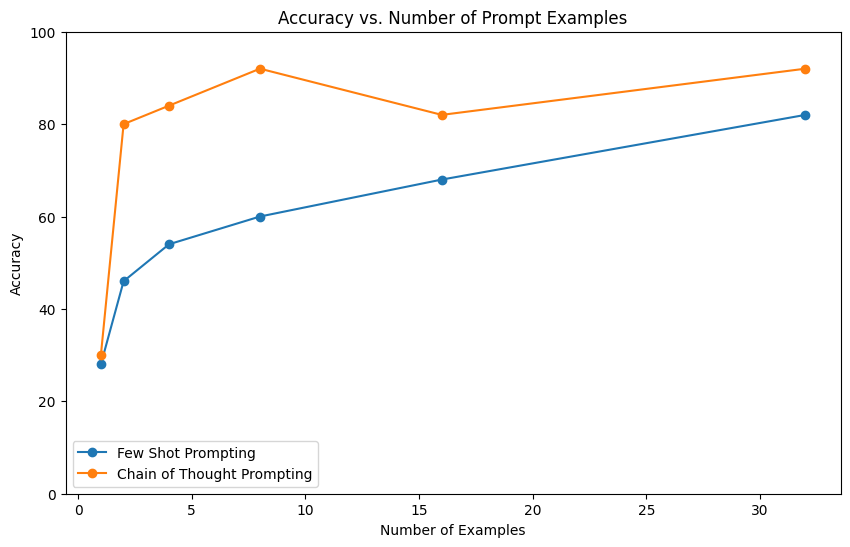

In [89]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(N, few_shot, marker='o', label='Few Shot Prompting')
plt.plot(N, cot, marker='o', label='Chain of Thought Prompting')

plt.title("Accuracy vs. Number of Prompt Examples")
plt.xlabel("Number of Examples")
plt.ylabel("Accuracy")
plt.legend()

plt.xticks(np.arange(0, 32, step=5))
plt.ylim(0, 100)
plt.show()

# Submissions

## Free-response Checklist (check if you missed anything!)
We will look for the following free-responses in this notebook:
- Section 2: Question responses
- Section 3: Question response
- Section 4: Question response
- Section 5: Table/Plot and short write-up

## GradeScope File Submission
Here are the deliverables you need to submit to GradeScope:
- Write-up (`report.pdf`):
    - Section 2: Question responses
    - Section 3: Question response
    - Section 4: Question response
    - Section 5: Table/Plot and short write-up
- Code:
    - This notebook and py file: rename to `homework8.ipynb` and `homework8.py`. You can download the notebook and py file by going to the top-left corner of this webpage, `File -> Download -> Download .ipynb/.py`